In [3]:
import qt
from qt import dt, np, pd
import matplotlib.pyplot as plt
import sklearn.linear_model as sm
import seaborn as sns

In [4]:
N = 1000
sharpes = np.random.normal(0.5, 0.5, N)
means = np.zeros(N)

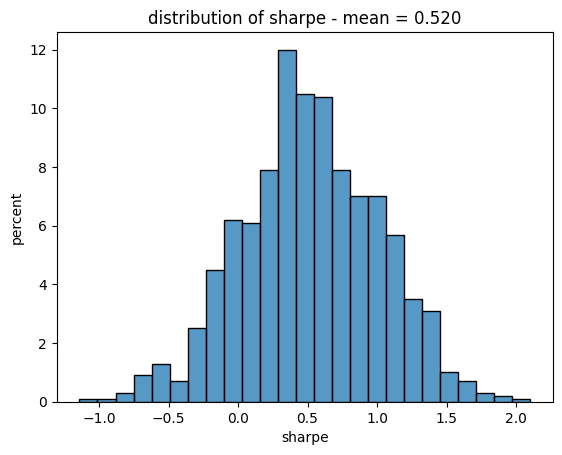

In [5]:
ax = sns.histplot(sharpes, stat="percent")
ax.set_title(f"distribution of sharpe - mean = {np.mean(sharpes):.3f}");
ax.set_xlabel("sharpe");
ax.set_ylabel("percent");

In [6]:
OBS_CNT = 1250
pnls = [np.random.normal(sharpe/np.sqrt(252), 1, OBS_CNT) for sharpe in sharpes] # mu = sharpe, std = 1
pnls = np.vstack(pnls)
corrmat = pd.DataFrame(pnls.T).corr()

In [16]:
cs = []
for i in range(1000):
	for j in range(i+1, 1000):
		cs.append(np.corrcoef(pnls[i], pnls[j])[0,1])

<Axes: ylabel='Count'>

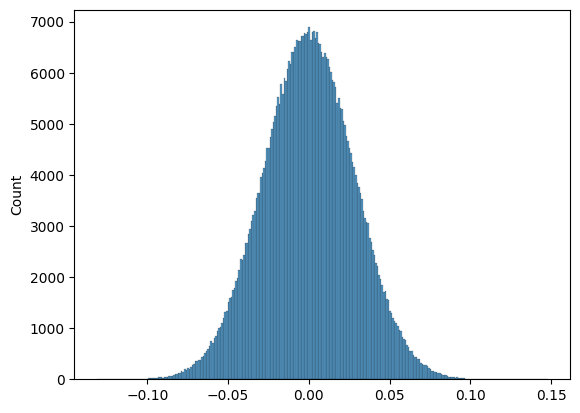

In [17]:
sns.histplot(cs)

In [18]:
len(cs)

499500

- looking at annual sharpe for spy

In [ ]:
t = pd.read_csv('spy_history.csv')
t['date'] = pd.to_datetime(t['date'])
t = t.sort_values('date').reset_index(drop=True)
t['ret_1d'] = 100*t['close'].pct_change().fillna(0)

In [ ]:
t['ret_mu_1y'] = t['ret_1d'].rolling(window=250).mean()
t['ret_std_1y'] = t['ret_1d'].rolling(window=250).std()
t['rolling_sharpe_1y'] = t['ret_mu_1y']/t['ret_std_1y']
t['rolling_sharpe_1y_ann'] = np.sqrt(252)*t['rolling_sharpe_1y']

In [ ]:
t['ret_1d'].mean()
t['ret_1d'].std()
t['ret_1d'].mean()/t['ret_1d'].std()

np.sqrt(252)*t['ret_1d'].mean()/t['ret_1d'].std()

In [ ]:
t[['ret_mu_1y', 'ret_std_1y', 'rolling_sharpe_1y']].plot()

In [ ]:
t[['rolling_sharpe_1y', 'rolling_sharpe_1y_ann']].plot()

In [ ]:
t.plot(x='date', y='close')